In [1]:
import numpy as np
import matplotlib.pyplot as plt

__Задача:__ предсказание баллов ЕГЭ ученика в зависимости от кол-ва лет стажа его репетитора

In [2]:
X = np.array([[ 1,  1],
              [ 1,  1],
              [ 1,  2],
              [ 1,  5],
              [ 1,  3],
              [ 1,  0],
              [ 1,  5],
              [ 1, 10],
              [ 1,  1],
              [ 1,  2]])

In [3]:
X.shape

(10, 2)

In [4]:
y = [45, 55, 50, 55, 60, 35, 75, 80, 50, 60]

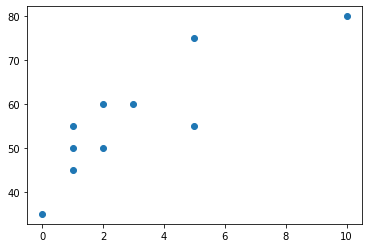

In [5]:
plt.scatter(X[:, 1], y);

In [6]:
def calc_mae(y, y_pred):
    err = np.mean(np.abs(y - y_pred))
    return err

def calc_mse(y, y_pred):
    err = np.mean((y - y_pred)**2)
    return err

### Домашнее задание <a class="anchor" id="hw"></a><center>

1. Подберите скорость обучения (eta) и количество итераций

In [7]:
n = X.shape[1]

eta = 1e-3 #изменена скорость
n_iter = 5000 #изменено количество итераций

W = np.array([1, 0.5])
print(f'Number of objects = {n} \
       \nLearning rate = {eta} \
       \nInitial weights = {W} \n')

for i in range(n_iter):
    y_pred = np.dot(X, W)
    err = calc_mse(y, y_pred)
    for k in range(W.shape[0]):
        W[k] -= eta * (1/n * 2 * X[:, k] @ (y_pred - y))
    if i % 1000 == 0: #изменен вывод
        eta /= 1.1
        print(f'Iteration #{i}: W_new = {W}, MSE = {round(err, 2)}')

Number of objects = 2        
Learning rate = 0.001        
Initial weights = [1.  0.5] 

Iteration #0: W_new = [1.54  2.385], MSE = 3047.75
Iteration #1000: W_new = [44.4048465   3.93175532], MSE = 44.17
Iteration #2000: W_new = [45.04742564  3.8152335 ], MSE = 43.97
Iteration #3000: W_new = [45.06201269  3.81258837], MSE = 43.97
Iteration #4000: W_new = [45.06247847  3.8125039 ], MSE = 43.97


2*. В этом коде мы избавляемся от итераций по весам, но тут есть ошибка, исправьте ее

In [8]:
n = X.shape[1]

eta = 1e-2 
n_iter = 100

W = np.array([1, 0.5])
print(f'Number of objects = {n} \
       \nLearning rate = {eta} \
       \nInitial weights = {W} \n')

for i in range(n_iter):
    y_pred = np.dot(X, W)
    err = calc_mse(y, y_pred)
#     for k in range(W.shape[0]):
#         W[k] -= eta * (1/n * 2 * X[:, k] @ (y_pred - y))
    # ИЗМЕНЕНИЯ
    W -= eta * (1/n * 2 * np.dot(X.T, y_pred - y)) # Перемножать необходимо X.T
    if i % 10 == 0:
        print(f'Iteration #{i}: W_new = {W}, MSE = {round(err,2)}')

Number of objects = 2        
Learning rate = 0.01        
Initial weights = [1.  0.5] 

Iteration #0: W_new = [ 6.4  19.35], MSE = 3047.75
Iteration #10: W_new = [19.96966932  8.87179137], MSE = 379.6
Iteration #20: W_new = [29.27719328  6.70531799], MSE = 172.93
Iteration #30: W_new = [35.16120834  5.60976141], MSE = 94.66
Iteration #40: W_new = [38.85365942  4.93848587], MSE = 63.9
Iteration #50: W_new = [41.16920131  4.51849616], MSE = 51.81
Iteration #60: W_new = [42.62118483  4.25519525], MSE = 47.05
Iteration #70: W_new = [43.53165976  4.0900943 ], MSE = 45.18
Iteration #80: W_new = [44.10257814  3.98656703], MSE = 44.45
Iteration #90: W_new = [44.46057568  3.9216497 ], MSE = 44.16


3*. Вместо того, чтобы задавать количество итераций, задайте другое условие останова алгоритма - когда веса перестают изменяться меньше определенного порога $\epsilon$.

In [9]:
n = X.shape[1]

eta = 1e-3 

W = np.array([1, 0.5])
W_min_dist = 1e-05 # минимальное изменение разницы весов
W_dist = np.inf # изменение веса
iter_count = 0 # счетчик итераций

print(f'Number of objects = {n} \
       \nLearning rate = {eta} \
       \nInitial weights = {W} \n')

while W_dist > W_min_dist:
    y_pred = np.dot(X, W)
    err = calc_mse(y, y_pred)
    new_W = W - eta * (1/n * 2 * np.dot(X.T, y_pred - y)) # запоминаем новый вес
    W_dist = np.linalg.norm(new_W - W, ord=2) # вычитаем из нового веса предыдущий
    if iter_count % 100 == 0:
        print(f'Iteration #{iter_count}: W_new = {W}, MSE = {round(err,2)}')
    W = new_W 
    iter_count += 1 # увеличиваем счетчик итераций

print(f'End.\nLast Iteration #{iter_count}: W_new = {W}, MSE = {round(err,2)}')
    

Number of objects = 2        
Learning rate = 0.001        
Initial weights = [1.  0.5] 

Iteration #0: W_new = [1.  0.5], MSE = 3047.75
Iteration #100: W_new = [18.42044991  8.64362496], MSE = 378.28
Iteration #200: W_new = [28.19393706  6.87135381], MSE = 177.99
Iteration #300: W_new = [34.38207507  5.74923039], MSE = 97.7
Iteration #400: W_new = [38.30012925  5.03875167], MSE = 65.51
Iteration #500: W_new = [40.78086716  4.5889081 ], MSE = 52.6
Iteration #600: W_new = [42.35156023  4.30408713], MSE = 47.43
Iteration #700: W_new = [43.34605333  4.12375114], MSE = 45.36
Iteration #800: W_new = [43.9757222  4.0095704], MSE = 44.53
Iteration #900: W_new = [44.37440056  3.93727622], MSE = 44.19
Iteration #1000: W_new = [44.62682599  3.89150276], MSE = 44.06
Iteration #1100: W_new = [44.78665057  3.86252104], MSE = 44.0
Iteration #1200: W_new = [44.88784439  3.8441711 ], MSE = 43.98
Iteration #1300: W_new = [44.95191582  3.83255274], MSE = 43.97
Iteration #1400: W_new = [44.99248301  3.82